# Simple Linear regression

## import the all required libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Salary_Data.csv')

## Let's do Some Analysis on our data  

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


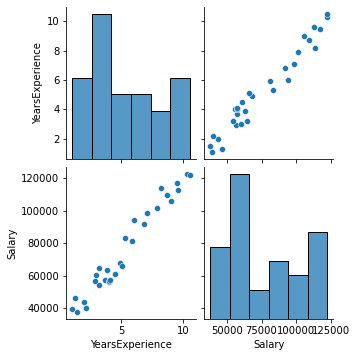

In [6]:
sns.pairplot(data=df, palette='viridus')

### Here we can see that there is linear relationship between salary and Experience

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

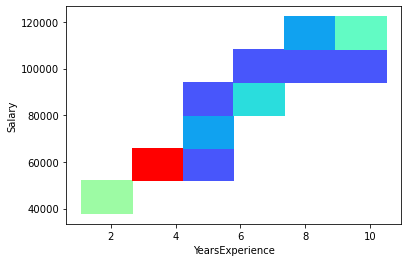

In [7]:
sns.histplot(data=df, x='YearsExperience',y='Salary',cmap='rainbow')

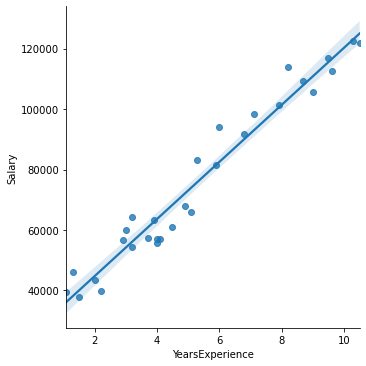

In [8]:
sns.lmplot(x='YearsExperience',y='Salary',data=df)

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### let's split our data and train using linear regression

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
y_pred

array([ 90235.22172621, 108172.10301013,  56249.55192509,  81738.80427593,
        40200.76340789, 116668.52046041])

### Let's predict single value of person having 1.5 years of Experience

In [14]:
regressor.predict([[1.5]])

array([40200.76340789])

### intercept will give the value of person having zero experience 

In [15]:
regressor.intercept_

26040.067657420906

In [16]:
regressor.predict([[0]])

array([26040.06765742])

### Let's visualise our test result 

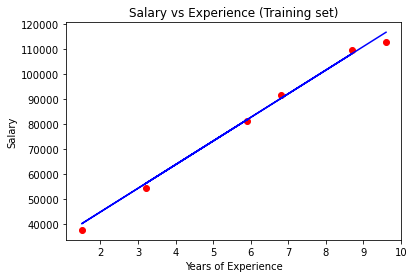

In [17]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')# it is our predict model line for test data 
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Evaluating our Model with r2_score

In [19]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.993422386435995
